# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = f"./measurements/full-x4/2022-03-26_14-02-02"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,26/03/2022_14:02:11,904,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,63.44,51.13,41.19,57.06,39.50,Prendido
1,26/03/2022_14:02:17,905,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,63.44,51.13,41.25,57.06,39.44,Prendido
2,26/03/2022_14:02:23,907,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,63.44,51.13,41.19,57.13,39.38,Prendido
3,26/03/2022_14:02:29,910,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,63.44,51.13,41.25,57.19,39.38,Prendido
4,26/03/2022_14:02:34,911,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,63.44,51.13,41.19,57.19,39.44,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,26/03/2022_14:11:22,883,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,63.75,51.06,40.94,57.50,38.88,Prendido
95,26/03/2022_14:11:28,883,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,63.75,51.13,40.94,57.56,38.88,Prendido
96,26/03/2022_14:11:34,882,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,63.69,51.13,40.94,57.63,38.88,Prendido
97,26/03/2022_14:11:40,881,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,63.75,51.13,40.94,57.69,38.88,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    print(t)
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)

26/03/2022_14:02:11


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

186


In [7]:
# Llenemos las listas con los datos
for i in range(n):
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # CO2
    
    # Con este loop cambiamos cualquier tipo de error en la medicion de co2 a -1
    co2_column = df["CO2"].to_numpy()
    for i in range(len(co2_column)):
        # Chequeamos que la celda sea un str y que sea mas larga que 4, ya que el sensor solo mide hasta 5000
        if type(co2_column[i]) is str and len(co2_column[i]) > 4:
            co2_column[i] = -1

    co2 = np.concatenate((co2, np.transpose(co2_column)))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

26/03/2022_14:02:11
26/03/2022_14:02:17
26/03/2022_14:02:23
26/03/2022_14:02:29
26/03/2022_14:02:34
26/03/2022_14:02:40
26/03/2022_14:02:46
26/03/2022_14:02:52
26/03/2022_14:02:58
26/03/2022_14:03:04
26/03/2022_14:03:10
26/03/2022_14:03:15
26/03/2022_14:03:21
26/03/2022_14:03:27
26/03/2022_14:03:33
26/03/2022_14:03:39
26/03/2022_14:03:45
26/03/2022_14:03:51
26/03/2022_14:03:57
26/03/2022_14:04:02
26/03/2022_14:04:08
26/03/2022_14:04:14
26/03/2022_14:04:20
26/03/2022_14:04:26
26/03/2022_14:04:32
26/03/2022_14:04:38
26/03/2022_14:04:44
26/03/2022_14:04:49
26/03/2022_14:04:55
26/03/2022_14:05:01
26/03/2022_14:05:07
26/03/2022_14:05:13
26/03/2022_14:05:19
26/03/2022_14:05:25
26/03/2022_14:05:30
26/03/2022_14:05:36
26/03/2022_14:05:42
26/03/2022_14:05:48
26/03/2022_14:05:54
26/03/2022_14:06:00
26/03/2022_14:06:06
26/03/2022_14:06:11
26/03/2022_14:06:17
26/03/2022_14:06:23
26/03/2022_14:06:29
26/03/2022_14:06:35
26/03/2022_14:06:41
26/03/2022_14:06:47
26/03/2022_14:06:53
26/03/2022_14:06:58


26/03/2022_17:37:14
26/03/2022_17:37:20
26/03/2022_17:37:26
26/03/2022_17:37:32
26/03/2022_17:37:38
26/03/2022_17:37:44
26/03/2022_17:37:50
26/03/2022_17:37:56
26/03/2022_17:38:01
26/03/2022_17:38:07
26/03/2022_17:38:13
26/03/2022_17:38:19
26/03/2022_17:38:25
26/03/2022_17:38:31
26/03/2022_17:38:37
26/03/2022_17:38:43
26/03/2022_17:38:48
26/03/2022_17:38:54
26/03/2022_17:39:00
26/03/2022_17:39:06
26/03/2022_17:39:12
26/03/2022_17:39:18
26/03/2022_17:39:24
26/03/2022_17:39:29
26/03/2022_17:39:35
26/03/2022_17:39:41
26/03/2022_17:39:47
26/03/2022_17:39:53
26/03/2022_17:39:59
26/03/2022_17:40:05
26/03/2022_17:40:11
26/03/2022_17:40:16
26/03/2022_17:40:22
26/03/2022_17:40:28
26/03/2022_17:40:34
26/03/2022_17:40:40
26/03/2022_17:40:46
26/03/2022_17:40:52
26/03/2022_17:40:57
26/03/2022_17:41:03
26/03/2022_17:41:09
26/03/2022_17:41:15
26/03/2022_17:41:21
26/03/2022_17:41:27
26/03/2022_17:41:33
26/03/2022_17:41:39
26/03/2022_17:41:44
26/03/2022_17:41:50
26/03/2022_17:41:56
26/03/2022_17:42:02


26/03/2022_21:24:35
26/03/2022_21:24:41
26/03/2022_21:24:47
26/03/2022_21:24:53
26/03/2022_21:24:59
26/03/2022_21:25:05
26/03/2022_21:25:11
26/03/2022_21:25:17
26/03/2022_21:25:22
26/03/2022_21:25:28
26/03/2022_21:25:34
26/03/2022_21:25:40
26/03/2022_21:25:46
26/03/2022_21:25:52
26/03/2022_21:25:58
26/03/2022_21:26:03
26/03/2022_21:26:09
26/03/2022_21:26:15
26/03/2022_21:26:21
26/03/2022_21:26:27
26/03/2022_21:26:33
26/03/2022_21:26:39
26/03/2022_21:26:45
26/03/2022_21:26:50
26/03/2022_21:26:56
26/03/2022_21:27:02
26/03/2022_21:27:08
26/03/2022_21:27:14
26/03/2022_21:27:20
26/03/2022_21:27:26
26/03/2022_21:27:32
26/03/2022_21:27:37
26/03/2022_21:27:43
26/03/2022_21:27:49
26/03/2022_21:27:55
26/03/2022_21:28:01
26/03/2022_21:28:07
26/03/2022_21:28:13
26/03/2022_21:28:19
26/03/2022_21:28:24
26/03/2022_21:28:30
26/03/2022_21:28:36
26/03/2022_21:28:42
26/03/2022_21:28:48
26/03/2022_21:28:54
26/03/2022_21:29:00
26/03/2022_21:29:05
26/03/2022_21:29:11
26/03/2022_21:29:17
26/03/2022_21:29:23


27/03/2022_00:31:51
27/03/2022_00:31:57
27/03/2022_00:32:03
27/03/2022_00:32:09
27/03/2022_00:32:14
27/03/2022_00:32:20
27/03/2022_00:32:26
27/03/2022_00:32:32
27/03/2022_00:32:38
27/03/2022_00:32:44
27/03/2022_00:32:50
27/03/2022_00:32:55
27/03/2022_00:33:01
27/03/2022_00:33:07
27/03/2022_00:33:13
27/03/2022_00:33:19
27/03/2022_00:33:25
27/03/2022_00:33:31
27/03/2022_00:33:37
27/03/2022_00:33:42
27/03/2022_00:33:48
27/03/2022_00:33:54
27/03/2022_00:34:00
27/03/2022_00:34:06
27/03/2022_00:34:12
27/03/2022_00:34:18
27/03/2022_00:34:23
27/03/2022_00:34:29
27/03/2022_00:34:35
27/03/2022_00:34:41
27/03/2022_00:34:47
27/03/2022_00:34:53
27/03/2022_00:34:59
27/03/2022_00:35:04
27/03/2022_00:35:10
27/03/2022_00:35:16
27/03/2022_00:35:22
27/03/2022_00:35:28
27/03/2022_00:35:34
27/03/2022_00:35:40
27/03/2022_00:35:46
27/03/2022_00:35:51
27/03/2022_00:35:57
27/03/2022_00:36:03
27/03/2022_00:36:09
27/03/2022_00:36:15
27/03/2022_00:36:21
27/03/2022_00:36:27
27/03/2022_00:36:32
27/03/2022_00:36:38


27/03/2022_03:37:49
27/03/2022_03:37:55
27/03/2022_03:38:01
27/03/2022_03:38:06
27/03/2022_03:38:12
27/03/2022_03:38:18
27/03/2022_03:38:24
27/03/2022_03:38:30
27/03/2022_03:38:36
27/03/2022_03:38:42
27/03/2022_03:38:47
27/03/2022_03:38:53
27/03/2022_03:38:59
27/03/2022_03:39:05
27/03/2022_03:39:11
27/03/2022_03:39:17
27/03/2022_03:39:23
27/03/2022_03:39:28
27/03/2022_03:39:34
27/03/2022_03:39:40
27/03/2022_03:39:46
27/03/2022_03:39:52
27/03/2022_03:39:58
27/03/2022_03:40:04
27/03/2022_03:40:10
27/03/2022_03:40:15
27/03/2022_03:40:21
27/03/2022_03:40:27
27/03/2022_03:40:33
27/03/2022_03:40:39
27/03/2022_03:40:45
27/03/2022_03:40:51
27/03/2022_03:40:56
27/03/2022_03:41:02
27/03/2022_03:41:08
27/03/2022_03:41:14
27/03/2022_03:41:20
27/03/2022_03:41:26
27/03/2022_03:41:32
27/03/2022_03:41:38
27/03/2022_03:41:43
27/03/2022_03:41:49
27/03/2022_03:41:55
27/03/2022_03:42:01
27/03/2022_03:42:07
27/03/2022_03:42:13
27/03/2022_03:42:19
27/03/2022_03:42:24
27/03/2022_03:42:30
27/03/2022_03:42:36


27/03/2022_06:39:09
27/03/2022_06:39:15
27/03/2022_06:39:21
27/03/2022_06:39:27
27/03/2022_06:39:33
27/03/2022_06:39:38
27/03/2022_06:39:44
27/03/2022_06:39:50
27/03/2022_06:39:56
27/03/2022_06:40:02
27/03/2022_06:40:08
27/03/2022_06:40:14
27/03/2022_06:40:19
27/03/2022_06:40:25
27/03/2022_06:40:31
27/03/2022_06:40:37
27/03/2022_06:40:43
27/03/2022_06:40:49
27/03/2022_06:40:55
27/03/2022_06:41:00
27/03/2022_06:41:06
27/03/2022_06:41:12
27/03/2022_06:41:18
27/03/2022_06:41:24
27/03/2022_06:41:30
27/03/2022_06:41:36
27/03/2022_06:41:42
27/03/2022_06:41:47
27/03/2022_06:41:53
27/03/2022_06:41:59
27/03/2022_06:42:05
27/03/2022_06:42:11
27/03/2022_06:42:17
27/03/2022_06:42:23
27/03/2022_06:42:28
27/03/2022_06:42:34
27/03/2022_06:42:40
27/03/2022_06:42:46
27/03/2022_06:42:52
27/03/2022_06:42:58
27/03/2022_06:43:04
27/03/2022_06:43:10
27/03/2022_06:43:15
27/03/2022_06:43:21
27/03/2022_06:43:27
27/03/2022_06:43:33
27/03/2022_06:43:39
27/03/2022_06:43:45
27/03/2022_06:43:51
27/03/2022_06:43:56


27/03/2022_09:35:06
27/03/2022_09:35:12
27/03/2022_09:35:17
27/03/2022_09:35:23
27/03/2022_09:35:29
27/03/2022_09:35:35
27/03/2022_09:35:41
27/03/2022_09:35:47
27/03/2022_09:35:53
27/03/2022_09:35:59
27/03/2022_09:36:04
27/03/2022_09:36:10
27/03/2022_09:36:16
27/03/2022_09:36:22
27/03/2022_09:36:28
27/03/2022_09:36:34
27/03/2022_09:36:40
27/03/2022_09:36:45
27/03/2022_09:36:51
27/03/2022_09:36:57
27/03/2022_09:37:03
27/03/2022_09:37:09
27/03/2022_09:37:15
27/03/2022_09:37:21
27/03/2022_09:37:26
27/03/2022_09:37:32
27/03/2022_09:37:38
27/03/2022_09:37:44
27/03/2022_09:37:50
27/03/2022_09:37:56
27/03/2022_09:38:02
27/03/2022_09:38:08
27/03/2022_09:38:13
27/03/2022_09:38:19
27/03/2022_09:38:25
27/03/2022_09:38:31
27/03/2022_09:38:37
27/03/2022_09:38:43
27/03/2022_09:38:49
27/03/2022_09:38:54
27/03/2022_09:39:00
27/03/2022_09:39:06
27/03/2022_09:39:12
27/03/2022_09:39:18
27/03/2022_09:39:24
27/03/2022_09:39:30
27/03/2022_09:39:36
27/03/2022_09:39:41
27/03/2022_09:39:47
27/03/2022_09:39:53


27/03/2022_12:30:22
27/03/2022_12:30:28
27/03/2022_12:30:34
27/03/2022_12:30:40
27/03/2022_12:30:45
27/03/2022_12:30:51
27/03/2022_12:30:57
27/03/2022_12:31:03
27/03/2022_12:31:09
27/03/2022_12:31:15
27/03/2022_12:31:21
27/03/2022_12:31:27
27/03/2022_12:31:32
27/03/2022_12:31:38
27/03/2022_12:31:44
27/03/2022_12:31:50
27/03/2022_12:31:56
27/03/2022_12:32:02
27/03/2022_12:32:08
27/03/2022_12:32:13
27/03/2022_12:32:19
27/03/2022_12:32:25
27/03/2022_12:32:31
27/03/2022_12:32:37
27/03/2022_12:32:43
27/03/2022_12:32:49
27/03/2022_12:32:55
27/03/2022_12:33:00
27/03/2022_12:33:06
27/03/2022_12:33:12
27/03/2022_12:33:18
27/03/2022_12:33:24
27/03/2022_12:33:30
27/03/2022_12:33:36
27/03/2022_12:33:41
27/03/2022_12:33:47
27/03/2022_12:33:53
27/03/2022_12:33:59
27/03/2022_12:34:05
27/03/2022_12:34:11
27/03/2022_12:34:17
27/03/2022_12:34:23
27/03/2022_12:34:28
27/03/2022_12:34:34
27/03/2022_12:34:40
27/03/2022_12:34:46
27/03/2022_12:34:52
27/03/2022_12:34:58
27/03/2022_12:35:04
27/03/2022_12:35:09


27/03/2022_15:08:56
27/03/2022_15:09:02
27/03/2022_15:09:08
27/03/2022_15:09:14
27/03/2022_15:09:20
27/03/2022_15:09:26
27/03/2022_15:09:32
27/03/2022_15:09:37
27/03/2022_15:09:43
27/03/2022_15:09:49
27/03/2022_15:09:55
27/03/2022_15:10:01
27/03/2022_15:10:07
27/03/2022_15:10:13
27/03/2022_15:10:19
27/03/2022_15:10:24
27/03/2022_15:10:30
27/03/2022_15:10:36
27/03/2022_15:10:42
27/03/2022_15:10:48
27/03/2022_15:10:54
27/03/2022_15:11:00
27/03/2022_15:11:05
27/03/2022_15:11:11
27/03/2022_15:11:17
27/03/2022_15:11:23
27/03/2022_15:11:29
27/03/2022_15:11:35
27/03/2022_15:11:41
27/03/2022_15:11:47
27/03/2022_15:11:52
27/03/2022_15:11:58
27/03/2022_15:12:04
27/03/2022_15:12:10
27/03/2022_15:12:16
27/03/2022_15:12:22
27/03/2022_15:12:28
27/03/2022_15:12:33
27/03/2022_15:12:39
27/03/2022_15:12:45
27/03/2022_15:12:51
27/03/2022_15:12:57
27/03/2022_15:13:03
27/03/2022_15:13:09
27/03/2022_15:13:15
27/03/2022_15:13:20
27/03/2022_15:13:26
27/03/2022_15:13:32
27/03/2022_15:13:38
27/03/2022_15:13:44


27/03/2022_17:43:55
27/03/2022_17:44:01
27/03/2022_17:44:07
27/03/2022_17:44:13
27/03/2022_17:44:19
27/03/2022_17:44:24
27/03/2022_17:44:30
27/03/2022_17:44:36
27/03/2022_17:44:42
27/03/2022_17:44:48
27/03/2022_17:44:54
27/03/2022_17:45:00
27/03/2022_17:45:06
27/03/2022_17:45:11
27/03/2022_17:45:17
27/03/2022_17:45:23
27/03/2022_17:45:29
27/03/2022_17:45:35
27/03/2022_17:45:41
27/03/2022_17:45:47
27/03/2022_17:45:52
27/03/2022_17:45:58
27/03/2022_17:46:04
27/03/2022_17:46:10
27/03/2022_17:46:16
27/03/2022_17:46:22
27/03/2022_17:46:28
27/03/2022_17:46:34
27/03/2022_17:46:39
27/03/2022_17:46:45
27/03/2022_17:46:51
27/03/2022_17:46:57
27/03/2022_17:47:03
27/03/2022_17:47:09
27/03/2022_17:47:15
27/03/2022_17:47:20
27/03/2022_17:47:26
27/03/2022_17:47:32
27/03/2022_17:47:38
27/03/2022_17:47:44
27/03/2022_17:47:50
27/03/2022_17:47:56
27/03/2022_17:48:02
27/03/2022_17:48:07
27/03/2022_17:48:13
27/03/2022_17:48:19
27/03/2022_17:48:25
27/03/2022_17:48:31
27/03/2022_17:48:37
27/03/2022_17:48:43


27/03/2022_20:16:16
27/03/2022_20:16:22
27/03/2022_20:16:28
27/03/2022_20:16:34
27/03/2022_20:16:39
27/03/2022_20:16:45
27/03/2022_20:16:51
27/03/2022_20:16:57
27/03/2022_20:17:03
27/03/2022_20:17:09
27/03/2022_20:17:15
27/03/2022_20:17:20
27/03/2022_20:17:26
27/03/2022_20:17:32
27/03/2022_20:17:38
27/03/2022_20:17:44
27/03/2022_20:17:50


In [8]:
# Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos
# Parece hincha pelotas así como está ahora, pero después lo voy a necesitar así que me conviene definirlo así

pos1 = np.where(np.diff(estado_valvula_co2_1) == 1)[0].tolist() # encuentro el número de posición del primer momento de la danza
pos2 = np.where(np.diff(estado_valvula_co2_2) == 1)[0].tolist() # y así con los demás
pos3 = np.where(np.diff(estado_valvula_co2_3) == 1)[0].tolist()
pos4 = np.where(np.diff(estado_valvula_co2_4) == 1)[0].tolist()
pos5 = np.where(np.diff(estado_valvula_compost_4) == 1)[0].tolist()

pos = pos1 + pos2 + pos3 + pos4 + pos5 # los guardo ordenados
pos.sort()

danza = [] # guardo los tiempos para graficarlos y visualizarlos rápidamente
for i in range(len(pos)):
    danza.append(tiempos[pos[i]])

# Gráficos

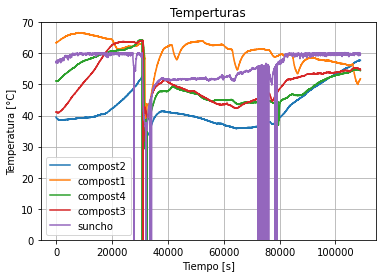

In [9]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho, '-', markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1, '-', markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2, '-', markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3, '-', markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4, '-', markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(0,70)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


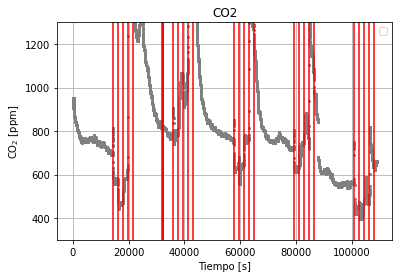

In [10]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", color="grey", markersize=4)
#plt.plot(tiempos, co2, "o", color="blue", label="TPS")
#plt.plot(tiempos, co2, "o", color="orange", label="Celulosa")
#plt.plot(tiempos, co2, "o", color="green", label=r"TPS/NP-$\mathrm{TiO_2}$")
#plt.plot(tiempos, co2, "o", color="red", label="Blanco")
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=5000, color="red")
plt.grid()
plt.legend()
plt.xlabel("Tiempo [s]")
plt.ylabel(r"$\mathrm{CO_2}$ [ppm]")

plt.ylim(300,1300)

plt.savefig(f"{PATH}/figuras/CO2_completo.png")
plt.show()

# Integración

In [11]:
inicio = [] # Posición para empezar a medir el área
fin = []
for i in range(len(pos) - 1):
    if pos[i + 1] - pos[i] < 500:
        #inicio.append(pos[i] + 60) # Dejamos 60 posiciones (5 minutos aprox) de espera
        inicio.append(pos[i])
        fin.append(pos[i + 1])

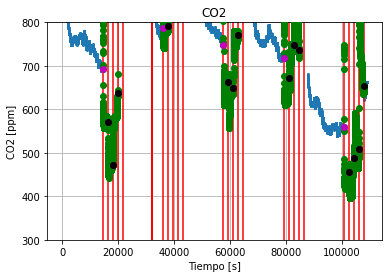

In [12]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")

#plt.xlim(150000,200000)
plt.ylim(300,800)

plt.scatter(tiempos[inicio], co2[inicio], color="m", zorder=4) #marco el inicio de cada área en color magenta
plt.scatter(tiempos[fin], co2[fin], color="k", zorder=5) #marco el fin de cada área en color negro
for i in range(len(inicio)):
    plt.scatter(tiempos[inicio[i]:fin[i]], co2[inicio[i]:fin[i]], color="g", zorder=3)
    
plt.savefig(f"{PATH}/figuras/areas_pintadas.png")
plt.show()

In [13]:
#CALCULO UN VALOR PROMEDIO, Y SU ERROR
promedio=[]
promedio_std=[]
for i in range(len(inicio)):
    promedio.append(np.mean(co2[inicio[i]:fin[i]].astype(float)))
    promedio_std.append(np.std(co2[inicio[i]:fin[i]].astype(float)))

In [14]:
promedio1 = []
promedio2 = []
promedio3 = []
promedio4 = []

promedio_std1 = []
promedio_std2 = []
promedio_std3 = []
promedio_std4 = []

for i in range(int(len(promedio) / 4)):
    promedio1.append(promedio[4 * i])
    promedio2.append(promedio[4 * i + 1])
    promedio3.append(promedio[4 * i + 2])
    promedio4.append(promedio[4 * i + 3])
    
    promedio_std1.append(promedio_std[4 * i])
    promedio_std2.append(promedio_std[4 * i + 1])
    promedio_std3.append(promedio_std[4 * i + 2])
    promedio_std4.append(promedio_std[4 * i + 3])

a=np.transpose(np.array([np.arange(1,(int(len(promedio1)))+1,1),promedio1,promedio2,promedio3,promedio4]))
np.savetxt(f'{PATH}/figuras/promedio.csv', a, delimiter=', ', newline='\n', header='nro,promedio1,promedio2,promedio3,promedio4')

b=np.transpose(np.array([np.arange(1,(int(len(promedio_std1)))+1,1),promedio_std1,promedio_std2,promedio_std3,promedio_std4]))
np.savetxt(f'{PATH}/figuras/promedio_std.csv', b, delimiter=', ', newline='\n', header='nro,promedio_std1,promedio_std2,promedio_std3,promedio_std4')


In [15]:
promedio

[584.1465798045602,
 471.88925081433223,
 573.9967426710098,
 1530.6807817589577,
 739.0,
 -0.5,
 -0.5,
 785.0553745928339,
 996.6644951140065,
 993.1107491856677,
 1600.1596091205213,
 644.5667752442997,
 626.9413680781759,
 756.42996742671,
 1345.6058631921824,
 634.700325732899,
 718.0325732899023,
 821.8697068403909,
 1166.2638436482084,
 452.5309446254072,
 428.1954397394137,
 503.78175895765474,
 691.8697068403909]

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [16]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): # Meter el área
    return F * x * 44 / (den * 60)

In [17]:
gramos(np.array(promedio))

array([ 2.86678521e-05,  2.31586587e-05,  2.81697340e-05,  7.51204096e-05,
        3.62675114e-05, -2.45382350e-08, -2.45382350e-08,  3.85277466e-05,
        4.89127753e-05,  4.87383700e-05,  7.85301852e-05,  3.16330620e-05,
        3.07680693e-05,  3.71229127e-05,  6.60375859e-05,  3.11488515e-05,
        3.52385041e-05,  4.03344641e-05,  5.72361126e-05,  2.22086214e-05,
        2.10143207e-05,  2.47238304e-05,  3.39545230e-05])